# Connecticut Universities Rankings

Authors : Sarutobi Hiruzen Ms. Jazzy Lazaro Keys

Aim : Probe features in school ratings submitted by student reviewers

In [432]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Part 1 - Preprocessing

In [433]:
df = pd.read_csv('C:/Users/Ayuk Ero-Sannin/Downloads/Rate My Professor - Schools.csv')
df.head(25)

,School,Unnamed: 1,Type,State,Reputation,Internet,Opportunity,Clubs,Happiness,Location,Food,Facilities,Social,Safety,Total_Ratings_Submitted,Unnamed: 15,Overall_Rating
0,Southern Connecticut State University,NaN,Public,Connecticut,3.1,3.1,3.2,3.4,3.4,3.1,2.4,3.5,3.1,3.8,205.0,NaN,3.2
1,Eastern Connecticut State University,NaN,Public,Connecticut,3.6,3.1,3.5,3.7,4.0,3.0,2.7,4.1,3.3,3.9,194.0,NaN,3.5
2,Central Connecticut State University,NaN,Public,Connecticut,3.3,3.2,3.3,3.2,3.5,3.4,2.6,3.4,2.9,3.7,279.0,NaN,3.3
3,Western Connecticut State University,NaN,Public,Connecticut,3.1,3.1,3.2,2.9,3.2,3.3,2.7,3.4,2.9,3.8,155.0,NaN,3.2
4,Albertus Magnus,NaN,Private,Connecticut,3.6,3.9,3.6,2.2,3.9,3.6,2.1,3.4,3.0,4.0,14.0,NaN,3.3
5,Quinnipiac University,NaN,Private,Connecticut,4.1,3.5,4.0,3.7,4.1,3.9,2.9,4.4,3.7,4.4,275.0,NaN,3.9
6,Fairfield University,NaN,Private,Connecticut,4.3,3.6,4.2,3.7,4.3,4.4,3.0,4.4,3.8,4.6,127.0,NaN,4.0
7,University of New Haven,NaN,Private,Connecticut,3.8,3.1,3.8,3.8,3.9,3.1,2.7,3.5,3.4,4.1,203.0,NaN,3.5
8,University of Hartford,NaN,Private,Connecticut,3.5,3.4,3.6,3.5,3.8,3.5,3.0,3.4,3.3,3.4,193.0,NaN,3.4
9,Sacred Heart University,NaN,Private,Connecticut,3.9,3.7,3.9,3.7,3.9,3.6,3.3,4.1,3.6,4.2,173.0,NaN,3.8


In [434]:
# Drop empty columns
df = df.dropna(axis=1, how='all', inplace=False)

# Drop empty rows
df = df.dropna(axis=0, how='all', inplace=False)

# Round last column to nearest integer
df.Overall_Rating = df.Overall_Rating.round()

# Verify that changes occurred
df.head(25)

,School,Type,State,Reputation,Internet,Opportunity,Clubs,Happiness,Location,Food,Facilities,Social,Safety,Total_Ratings_Submitted,Overall_Rating
0,Southern Connecticut State University,Public,Connecticut,3.1,3.1,3.2,3.4,3.4,3.1,2.4,3.5,3.1,3.8,205.0,3.0
1,Eastern Connecticut State University,Public,Connecticut,3.6,3.1,3.5,3.7,4.0,3.0,2.7,4.1,3.3,3.9,194.0,4.0
2,Central Connecticut State University,Public,Connecticut,3.3,3.2,3.3,3.2,3.5,3.4,2.6,3.4,2.9,3.7,279.0,3.0
3,Western Connecticut State University,Public,Connecticut,3.1,3.1,3.2,2.9,3.2,3.3,2.7,3.4,2.9,3.8,155.0,3.0
4,Albertus Magnus,Private,Connecticut,3.6,3.9,3.6,2.2,3.9,3.6,2.1,3.4,3.0,4.0,14.0,3.0
5,Quinnipiac University,Private,Connecticut,4.1,3.5,4.0,3.7,4.1,3.9,2.9,4.4,3.7,4.4,275.0,4.0
6,Fairfield University,Private,Connecticut,4.3,3.6,4.2,3.7,4.3,4.4,3.0,4.4,3.8,4.6,127.0,4.0
7,University of New Haven,Private,Connecticut,3.8,3.1,3.8,3.8,3.9,3.1,2.7,3.5,3.4,4.1,203.0,4.0
8,University of Hartford,Private,Connecticut,3.5,3.4,3.6,3.5,3.8,3.5,3.0,3.4,3.3,3.4,193.0,3.0
9,Sacred Heart University,Private,Connecticut,3.9,3.7,3.9,3.7,3.9,3.6,3.3,4.1,3.6,4.2,173.0,4.0


In [435]:
# Replace null cells with column means
df = df.replace( 0, np.nan)
df = df.fillna(df.mean().iloc[0])

In [436]:
# Verify that change occurred (Safety = 0 => Safety = column_mean)
df.iloc[48]

School                     Granite State College, Manchester
Type                                                  Public
State                                          New Hampshire
Reputation                                                 2
Internet                                                   2
Opportunity                                                2
Clubs                                                      2
Happiness                                                  3
Location                                                 2.5
Food                                                       2
Facilities                                                 2
Social                                                     2
Safety                                               3.76075
Total_Ratings_Submitted                                    2
Overall_Rating                                             2
Name: 51, dtype: object

## Part 2 - Data Visualization Using MatPlotLib

C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


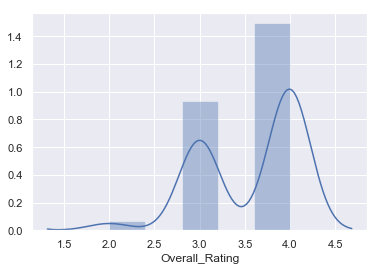

In [437]:
sns.set()

sns.distplot(df['Overall_Rating'].dropna())

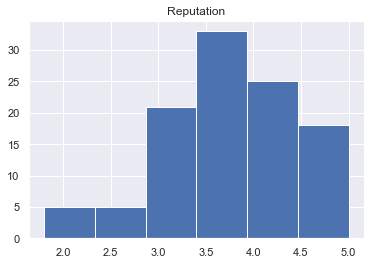

In [438]:
hist = df.hist(column='Reputation', bins=6)

## Part 3 - Classification Using Decicion Trees

In [439]:
# Prepare table for training and testing

# Use columns 4 - 13 as features block
features = df.iloc[:, 3:14]

# Use last column as outcome block to test predictions
outcome = df.iloc[:, 14]

# Convert array of floating-point values to array of integers
outcome = outcome.astype(int)

# Split blocks for training and testing
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, random_state=0, test_size = 0.2)

In [440]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth= 5)
tree_clf.fit(features_train, outcome_train)
y_pred = tree_clf.predict(features_test)
print('Test accuracy: ', tree_clf.score(features_test, outcome_test))

Test accuracy:  0.8636363636363636


In [441]:
# Determine ideal tree depth by cinorporating cross-validation

# Lists to record respective means & standard deviation
average_training = []
average_test_CV = []
standard_CV = []
tree_heights = list(range(1, 15))

# Run different tree depths
for height in tree_heights :
    
    dTree = DecisionTreeClassifier(criterion='entropy', max_depth=height)
    dTree.fit(features_train, outcome_train)
    
    scores = cross_validate(estimator = dTree, X = features, y = outcome, cv = 10, return_train_score = True)
    
    print('Tree Depth : ', str(height))
    print('Average cross-validation training score: ', np.mean(scores['train_score']))
    print('Average cross-validation test score: ', np.mean(scores['test_score']))
    print('95% confidence interval for CV accuracy score: ({}, {})'.format(
    np.mean(scores['test_score']) - 2 * np.std(scores['test_score']),
        np.mean(scores['test_score']) + 2 * np.std(scores['test_score'])))
    
    average_test_CV.append(np.mean(scores['test_score']))
    average_training.append(np.mean(scores['train_score']))
    standard_CV.append(np.std(scores['test_score']))

C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Tree Depth :  1
Average cross-validation training score:  0.8692090832477113
Average cross-validation test score:  0.872948717948718
95% confidence interval for CV accuracy score: (0.7148017810548433, 1.0310956548425927)
Tree Depth :  2
Average cross-validation training score:  0.8971967536740513
Average cross-validation test score:  0.8973076923076924
95% confidence interval for CV accuracy score: (0.7628721592164447, 1.03174322539894)
Tree Depth :  3
Average cross-validation training score:  0.9179679292550306
Average cross-validation test score:  0.8589743589743591
95% confidence interval for CV accuracy score: (0.6253256569100606, 1.0926230610386578)


C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Tree Depth :  4
Average cross-validation training score:  0.9626464714099352
Average cross-validation test score:  0.802948717948718
95% confidence interval for CV accuracy score: (0.5429582007494737, 1.0629392351479625)
Tree Depth :  5
Average cross-validation training score:  0.9854795026610177
Average cross-validation test score:  0.8206410256410257
95% confidence interval for CV accuracy score: (0.5581328935857791, 1.0831491576962722)
Tree Depth :  6
Average cross-validation training score:  1.0
Average cross-validation test score:  0.8046153846153847
95% confidence interval for CV accuracy score: (0.5744218005876198, 1.0348089686431496)


C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Tree Depth :  7
Average cross-validation training score:  1.0
Average cross-validation test score:  0.8406410256410257
95% confidence interval for CV accuracy score: (0.6406211383983551, 1.0406609128836963)
Tree Depth :  8
Average cross-validation training score:  1.0
Average cross-validation test score:  0.812948717948718
95% confidence interval for CV accuracy score: (0.5921842521137225, 1.0337131837837137)
Tree Depth :  9
Average cross-validation training score:  1.0
Average cross-validation test score:  0.8335897435897437
95% confidence interval for CV accuracy score: (0.6127855234850499, 1.0543939636944375)


C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Tree Depth :  10
Average cross-validation training score:  1.0
Average cross-validation test score:  0.838974358974359
95% confidence interval for CV accuracy score: (0.6056770949264736, 1.0722716230222444)
Tree Depth :  11
Average cross-validation training score:  1.0
Average cross-validation test score:  0.8535897435897436
95% confidence interval for CV accuracy score: (0.6360220525204153, 1.0711574346590718)
Tree Depth :  12
Average cross-validation training score:  1.0
Average cross-validation test score:  0.8312820512820513
95% confidence interval for CV accuracy score: (0.6920619071910827, 0.97050219537302)
Tree Depth :  13
Average cross-validation training score:  1.0
Average cross-validation test score:  0.8252564102564103
95% confidence interval for CV accuracy score: (0.6172381475169669, 1.0332746729958537)
Tree Depth :  14
Average cross-validation training score:  1.0
Average cross-validation test score:  0.8306410256410258
95% confidence interval for CV accuracy score: (0.6

C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


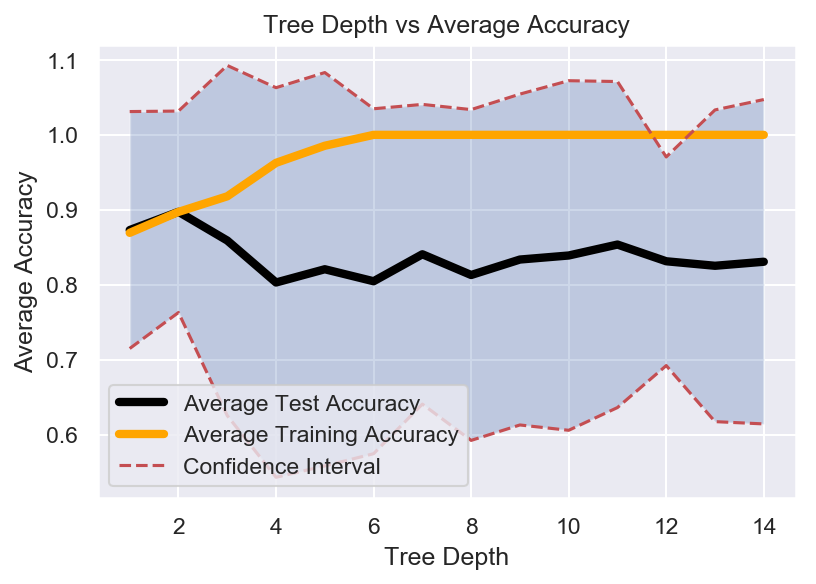

In [442]:
# Plot a Validation Curve from data gathered

import matplotlib.pyplot as plt
sns.set()

plt.figure(dpi=150)
plt.plot(tree_heights, average_test_CV, linewidth = 4, label = 'Average Test Accuracy', color = 'black')
plt.plot(tree_heights, average_training, linewidth = 4, label = 'Average Training Accuracy', color = 'orange')
plt.plot(tree_heights, np.array(average_test_CV) + 2 * np.array(standard_CV), 'r--', label = 'Confidence Interval')
plt.plot(tree_heights, np.array(average_test_CV) - 2 * np.array(standard_CV), 'r--')
plt.fill_between(tree_heights, np.array(average_test_CV) + 2 * np.array(standard_CV), np.array(average_test_CV) - 2 * np.array(standard_CV), alpha = 0.28)

plt.xlabel('Tree Depth')
plt.ylabel('Average Accuracy')
plt.title('Tree Depth vs Average Accuracy')

plt.legend()
plt.show()

Test accuracy:  0.9545454545454546
Feature : Reputation ; importance :  0.0
Feature : Internet ; importance :  0.06819948895390858
Feature : Opportunity ; importance :  0.10119299904942149
Feature : Clubs ; importance :  0.12402144417528278
Feature : Happiness ; importance :  0.4960426455916361
Feature : Location ; importance :  0.0
Feature : Food ; importance :  0.02982443755682239
Feature : Facilities ; importance :  0.0
Feature : Social ; importance :  0.0
Feature : Safety ; importance :  0.08000495729581555
Feature : Total_Ratings_Submitted ; importance :  0.1007140273771131


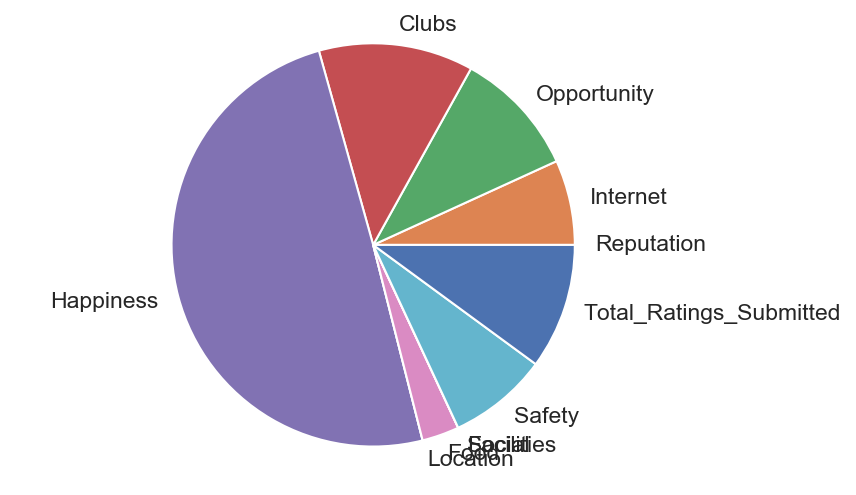

In [443]:
tree_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth= 2)
tree_clf2.fit(features_train, outcome_train)
y_pred = tree_clf2.predict(features_test)
print('Test accuracy: ', tree_clf2.score(features_test, outcome_test))

importance = list(tree_clf.feature_importances_)
index = 0

for i in features.columns :
    print('Feature :', i,'; importance : ', importance[index])
    index+=1

plt.figure(dpi=150)
plt.pie(importance, labels = features.columns)
plt.axis('equal')

plt.show()

## Part 4 - Classification Using K-Means Clustering

In [444]:
featuresSet = df.iloc[:, 3:14]

Size :  1 ; Current error :  1274686.7094436686
Size :  2 ; Current error :  368081.0246580415
Size :  3 ; Current error :  168747.73860527237
Size :  4 ; Current error :  110882.54616890872
Size :  5 ; Current error :  55868.067473270385
Size :  6 ; Current error :  39630.5012858245
Size :  7 ; Current error :  27709.525131140967
Size :  8 ; Current error :  19939.020673328087
Size :  9 ; Current error :  14465.525909411925
Size :  10 ; Current error :  9923.590675814517
Size :  11 ; Current error :  8204.885689818339
Size :  12 ; Current error :  6771.838659146775
Size :  13 ; Current error :  5489.218485904443
Size :  14 ; Current error :  4520.4472007458535
Size :  15 ; Current error :  3844.831997809205
Size :  16 ; Current error :  3345.5740379646127
Size :  17 ; Current error :  2906.862088859598
Size :  18 ; Current error :  2703.8222271179848
Size :  19 ; Current error :  2292.7474936490926
Size :  20 ; Current error :  2066.9359113863484


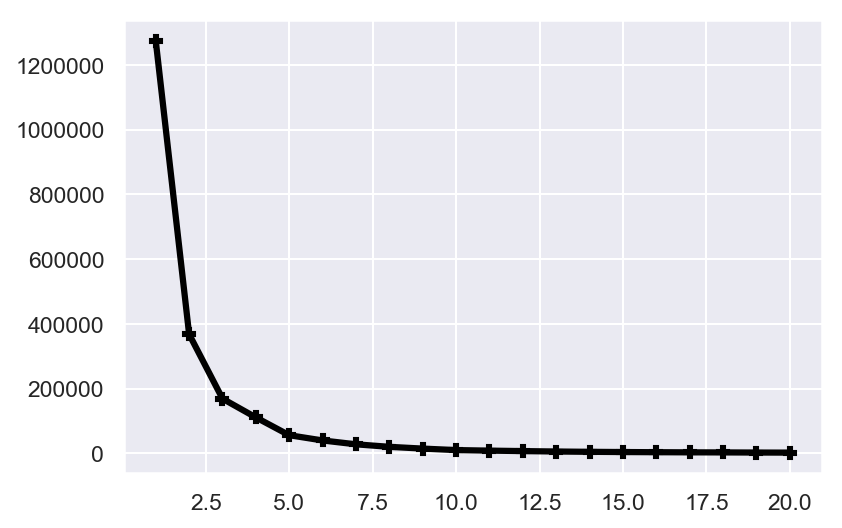

In [445]:
# Perform Elbow Method to pick ideal number of clusters
cluster_size = list(range(1,21))
errors = []

# Run clustering for different cluster sizes
for j in cluster_size :
    kmeans = KMeans(n_clusters = j)
    kmeans.fit(features)
    y_kmeans = kmeans.predict(features)
    print('Size : ', str(j), '; Current error : ', kmeans.inertia_)
    errors.append(kmeans.inertia_)
    
    # Plot change in error with rexpect to change in cluster size
plt.figure(dpi=150)
plt.plot(cluster_size, errors, color = 'black', linewidth = 3, marker = "P")
plt.show()

In [446]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(featuresSet)

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

print('Current error : ', kmeans.inertia_)

Current error :  496.5329754699757


In [447]:
respective_cluster = kmeans.labels_

df['Cluster'] = respective_cluster

df.head()

,School,Type,State,Reputation,Internet,Opportunity,Clubs,Happiness,Location,Food,Facilities,Social,Safety,Total_Ratings_Submitted,Overall_Rating,Cluster
0,Southern Connecticut State University,Public,Connecticut,3.1,3.1,3.2,3.4,3.4,3.1,2.4,3.5,3.1,3.8,205.0,3.0,3
1,Eastern Connecticut State University,Public,Connecticut,3.6,3.1,3.5,3.7,4.0,3.0,2.7,4.1,3.3,3.9,194.0,4.0,2
2,Central Connecticut State University,Public,Connecticut,3.3,3.2,3.3,3.2,3.5,3.4,2.6,3.4,2.9,3.7,279.0,3.0,3
3,Western Connecticut State University,Public,Connecticut,3.1,3.1,3.2,2.9,3.2,3.3,2.7,3.4,2.9,3.8,155.0,3.0,3
4,Albertus Magnus,Private,Connecticut,3.6,3.9,3.6,2.2,3.9,3.6,2.1,3.4,3.0,4.0,14.0,3.0,3


## Part 5 - Data Exploration Using KNN

C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ayuk Ero-Sannin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has 

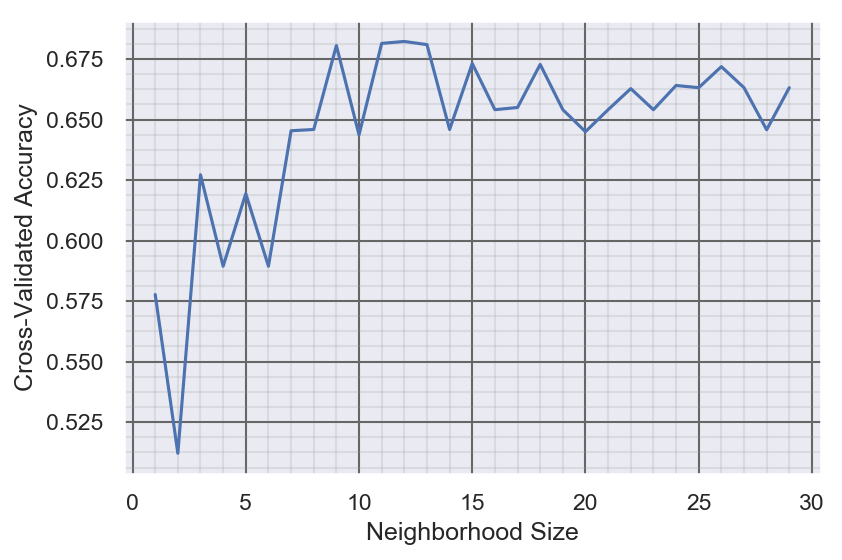

In [448]:
# choose neighborhood between 1 to 15
k_range = range(1, 30)
k_scores = []

# use iteration to caclulate different k in models, then return the average accuracy based on cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k, p = 2, metric='euclidean')
    scores = cross_val_score(knn, features, outcome, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Observe accuracy with respect to neighborhood size
plt.figure(dpi=150)
plt.plot(k_range, k_scores)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Neighborhood Size')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [449]:
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(features_train)
X_test_scaled = X_scaler.transform(features_test)

# Build KNN model with recommended neighborhood size
classifier = KNeighborsClassifier(n_neighbors=12, p=2, metric='euclidean')
classifier.fit(X_train_scaled, outcome_train)
y_pred = classifier.predict(X_test_scaled)

#check accuracy of our model on the test data
print('Accuracy at n = 12 : ', classifier.score(X_test_scaled, outcome_test))


# Build confusion matrix
print('Confusion Matrix : ')
cm = confusion_matrix(outcome_test, y_pred)
print(cm)

Accuracy at n = 12 :  0.8636363636363636
Confusion Matrix : 
[[ 0  1  0]
 [ 0  6  1]
 [ 0  1 13]]
